
Глобальный набор данных о дорожно-транспортных происшествиях содержит 10 000 записей о дорожно-транспортных происшествиях из разных мест по всему миру. Он предоставляет важную информацию о характере дорожно-транспортных происшествий, причинах и способствующих факторах, помогая исследователям, политикам и разработчикам искусственного интеллекта анализировать тенденции и повышать безопасность дорожного движения.

In [2]:
import pandas as pd
#Считываем csv файл
df = pd.read_csv("global_traffic_accidents.csv")
df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving


Вывод форматов до редактирования 

In [3]:
#форматы
print(df.dtypes)

Accident ID           object
Date                  object
Time                  object
Location              object
Latitude             float64
Longitude            float64
Weather Condition     object
Road Condition        object
Vehicles Involved      int64
Casualties             int64
Cause                 object
dtype: object


Переведем столбец Date в формат datetime для удобной работы

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving


Вывод форматов после редактирования 

In [5]:
print(df.dtypes)

Accident ID                  object
Date                 datetime64[ns]
Time                         object
Location                     object
Latitude                    float64
Longitude                   float64
Weather Condition            object
Road Condition               object
Vehicles Involved             int64
Casualties                    int64
Cause                        object
dtype: object


Статистика (среднее, минимум, максимум и т.д.) по количеству транспортных средств.

In [6]:
vehicles_summary = df['Vehicles Involved'].describe()
print(vehicles_summary)

count    10000.000000
mean         2.999100
std          1.408935
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Vehicles Involved, dtype: float64


В какие месяцы произошло больше всего аварий

In [7]:
df['Month'] = df['Date'].dt.month
month_counts = df['Month'].value_counts().sort_index()
print(month_counts)

Month
1     817
2     808
3     840
4     765
5     874
6     864
7     836
8     834
9     869
10    822
11    828
12    843
Name: count, dtype: int64


Гистограмма с количесвом аварий по месяцам 

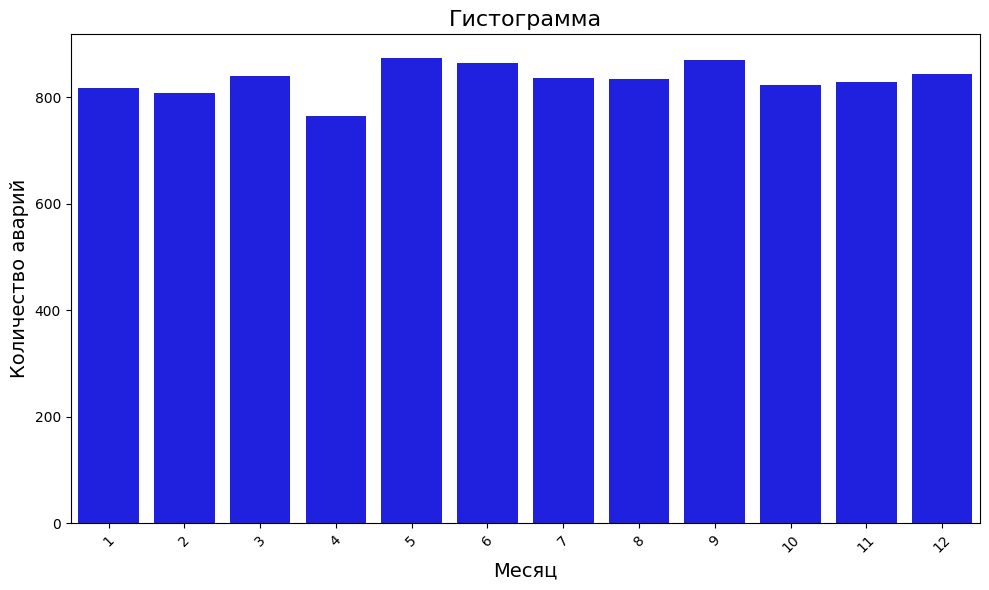

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Month'] = df['Date'].dt.month
month_counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))  
sns.barplot(x=month_counts.index, y=month_counts.values, color='blue')  

plt.title('Гистограмма', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество аварий', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

Вывод локаций и количества аварий

In [9]:
country = df['Location'].value_counts()
print(country)


Location
São Paulo, Brazil    1032
New York, USA        1016
Beijing, China       1014
Sydney, Australia    1006
Toronto, Canada      1003
London, UK           1000
Paris, France         995
Tokyo, Japan          989
Mumbai, India         987
Berlin, Germany       958
Name: count, dtype: int64


Гистограмма, которая показывает количество аварий и локации, где эти аварии произошли

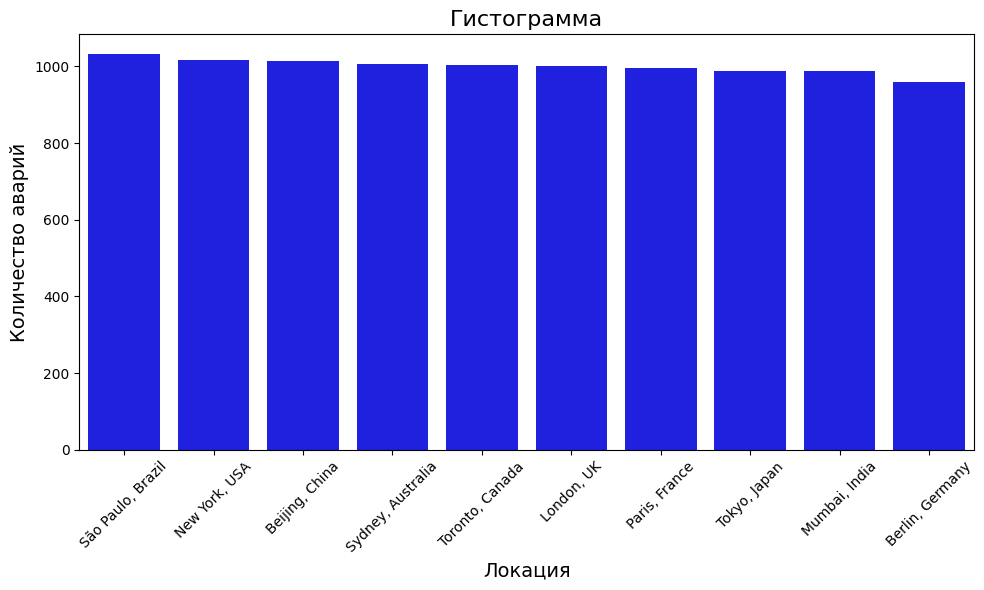

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

country = df['Location'].value_counts()

plt.figure(figsize=(10, 6))  
sns.barplot(x=country.index, y=country.values, color='blue')  

plt.title('Гистограмма', fontsize=16)
plt.xlabel('Локация', fontsize=14)
plt.ylabel('Количество аварий', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

Вывод начала и конца записей в данном датасете

In [11]:
print(df['Date'].min())
print(df['Date'].max())

2023-01-01 00:00:00
2024-12-31 00:00:00


Вычисление доли каждой причины аварии для каждой локации

In [12]:
group = df.groupby(['Location', 'Cause']).size().unstack(fill_value=0)

result = group.div(group.sum(axis=1), axis=0)*100

print(result.map(lambda x: f"{x:.2f}%"))

Cause             Distracted Driving Drunk Driving Mechanical Failure  \
Location                                                                
Beijing, China                16.17%        19.72%             15.88%   
Berlin, Germany               17.95%        15.24%             17.54%   
London, UK                    15.20%        16.60%             16.40%   
Mumbai, India                 16.01%        16.41%             16.72%   
New York, USA                 17.13%        16.44%             16.83%   
Paris, France                 16.28%        16.38%             15.38%   
Sydney, Australia             14.41%        17.30%             16.90%   
São Paulo, Brazil             18.02%        17.73%             16.18%   
Tokyo, Japan                  16.08%        16.08%             16.08%   
Toronto, Canada               16.05%        19.54%             17.45%   

Cause             Reckless Driving Speeding Weather Conditions  
Location                                                  

Вывод локаций с количеством пострадавших в авариях

In [13]:
Casualties_and_location = df.groupby('Location')['Casualties'].sum()

print(Casualties_and_location)

Location
Beijing, China       5233
Berlin, Germany      4827
London, UK           4924
Mumbai, India        4821
New York, USA        4992
Paris, France        5004
Sydney, Australia    4937
São Paulo, Brazil    5124
Tokyo, Japan         5017
Toronto, Canada      5003
Name: Casualties, dtype: int64
